# Instalação das dependências

In [ ]:
! pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from pandas.plotting import autocorrelation_plot

# Importação e Visualização dos dados

In [4]:
# Função para carregar e formatar dados de criptomoedas usando yfinance
def load_crypto_data(ticker, start_date):
  # Baixa os dados usando o ticker fornecido e a data de início
  df = yf.download(ticker, start=start_date, end=None)
  
  # Formatando os dados: converte o índice (Date) em uma coluna separada
  df = df.reset_index()

  # Adiciona uma coluna de volume formatada como int64 (yfinance já importa o volume em um formato correto)
  df['Volume'] = df['Volume'].astype('int64')

  # Exibe informações do DataFrame
  df.info()
  
  return df


In [ ]:
# Importa os dados do Bitcoin desde 1/1/2020 até o presente
btc_df = load_crypto_data('BTC-USD', '2020-01-01')

btc_df.head()

In [ ]:
# Importa os dados do Ethereum desde 1/1/2020 até o presente
eth_df = load_crypto_data('ETH-USD', '2020-01-01')

eth_df.head()

In [ ]:
# Merge dos dataframes com sufixos para evitar conflitos de nomes de colunas
market_df = pd.merge(btc_df, eth_df, on='Date', suffixes=('_btc', '_eth'))

# Adicionando nova coluna da diferença entre o preço de abertura e fechamento
for coin in ['btc', 'eth']:
    market_df[f'{coin}_day_diff'] = (market_df[f'Close_{coin}'] - market_df[f'Open_{coin}']) / market_df[f'Open_{coin}']

# Filtrando o DataFrame para datas a partir de 2020-01-01
market_df = market_df[market_df['Date'] >= '2020-01-01']

# Exibe as primeiras linhas do DataFrame resultante
market_df.head()

# Exploração dos Dados


## Visualização das Tendências de Preço

O Preço de fechamento das criptomoedas Bitcoin e Ethereum ao longo do tempo para observar suas tendências e flutuações. 

Ao visualizar as variações ao longo dos anos, podemos identificar padrões claros de alta ou baixa. Isso pode indicar momentos em que o mercado teve picos de alta ou quedas bruscas, revelando tendências de mercado que podem ser usadas para prever momentos ideais de compra ou venda. Se houver um padrão claro de ciclos, podemos justificar o uso de modelos como Séries Temporais

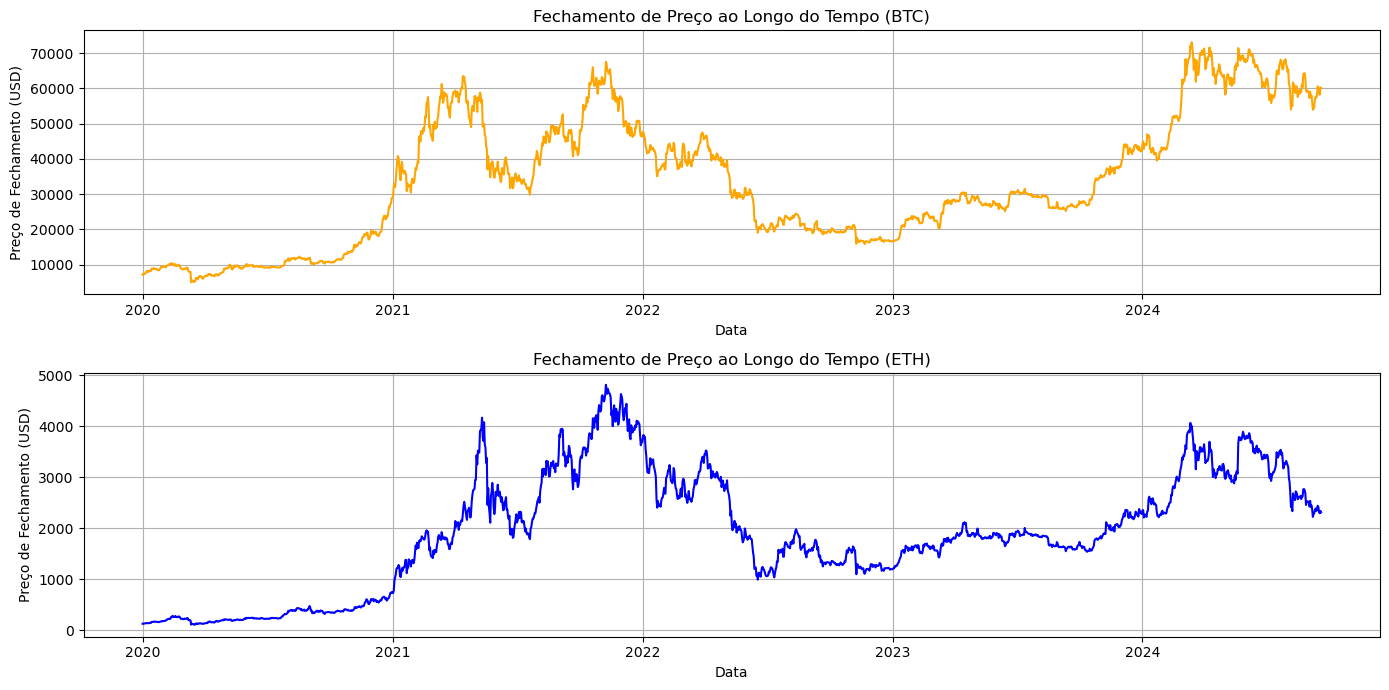

In [32]:
# Gráfico de preços ao longo do tempo para Bitcoin e Ethereum
plt.figure(figsize=(14, 7))

# Bitcoin
plt.subplot(2, 1, 1)
plt.plot(market_df['Date'], market_df['Close_btc'], label='Bitcoin', color='orange')
plt.title('Fechamento de Preço ao Longo do Tempo (BTC)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)

# Ethereum
plt.subplot(2, 1, 2)
plt.plot(market_df['Date'], market_df['Close_eth'], label='Ethereum', color='blue')
plt.title('Fechamento de Preço ao Longo do Tempo (ETH)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Análise de Volatilidade Diária

A volatilidade diária é calculada como a variação percentual entre o preço de fechamento e o de abertura em cada dia. O que podemos tirar disso? A volatilidade é um fator essencial para análise de risco. Se a volatilidade diária for alta, os ativos são considerados arriscados, mas com grande potencial de retorno. Essa análise ajuda a justificar o uso de modelos que são capazes de lidar com altos níveis de imprevisibilidade, para prever variações rápidas de preço. Identificar dias de alta volatilidade pode indicar momentos críticos para operações de compra ou venda.

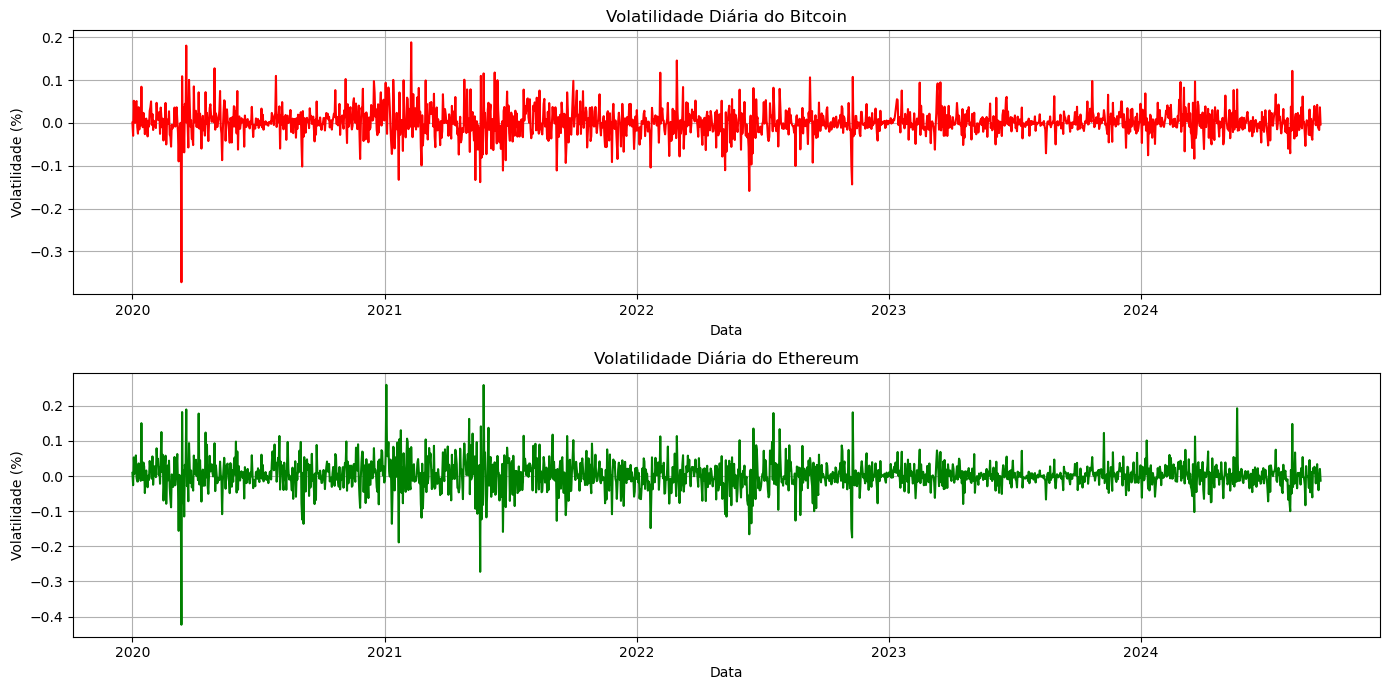

In [30]:
# Calculando a volatilidade (diferença percentual entre o preço de abertura e fechamento)
market_df['btc_volatility'] = (market_df['Close_btc'] - market_df['Open_btc']) / market_df['Open_btc']
market_df['eth_volatility'] = (market_df['Close_eth'] - market_df['Open_eth']) / market_df['Open_eth']

# Plotando a volatilidade ao longo do tempo
plt.figure(figsize=(14, 7))

# Bitcoin Volatilidade
plt.subplot(2, 1, 1)
plt.plot(market_df['Date'], market_df['btc_volatility'], label='Bitcoin Volatility', color='red')
plt.title('Volatilidade Diária do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Volatilidade (%)')
plt.grid(True)

# Ethereum Volatilidade
plt.subplot(2, 1, 2)
plt.plot(market_df['Date'], market_df['eth_volatility'], label='Ethereum Volatility', color='green')
plt.title('Volatilidade Diária do Ethereum')
plt.xlabel('Data')
plt.ylabel('Volatilidade (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Identificação de Padrões com Média Móvel

Calculamos a média móvel de 30 dias para os preços de fechamento, que suaviza as flutuações diárias e nos ajuda a ver tendências de longo prazo. A média móvel é plotada ao lado dos preços reais de fechamento.

A média móvel é uma ferramenta clássica de análise técnica que ajuda a identificar o início de novas tendências ou reversões de mercado. Se os preços atuais ultrapassarem consistentemente a média móvel, isso pode indicar uma tendência de alta, sugerindo um bom momento para compra. Por outro lado, se o preço estiver abaixo da média móvel, pode ser um sinal de venda. Isso pode justificar o uso de indicadores técnicos no modelo de machine learning para auxiliar na previsão de compras ou vendas futuras.

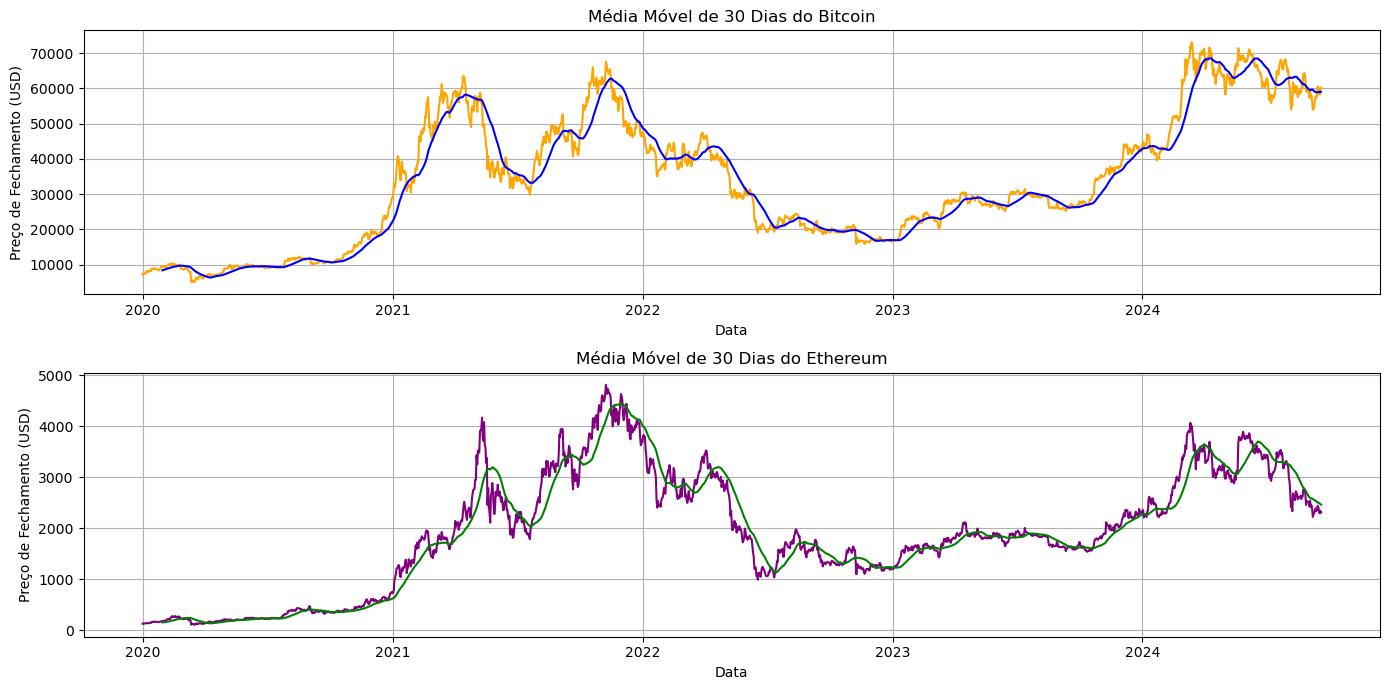

In [31]:
# Calculando médias móveis de 30 dias para o preço de fechamento
market_df['btc_ma30'] = market_df['Close_btc'].rolling(window=30).mean()
market_df['eth_ma30'] = market_df['Close_eth'].rolling(window=30).mean()

# Gráfico de preços de fechamento e médias móveis
plt.figure(figsize=(14, 7))

# Bitcoin Média Móvel
plt.subplot(2, 1, 1)
plt.plot(market_df['Date'], market_df['Close_btc'], label='Bitcoin Preço de Fechamento', color='orange')
plt.plot(market_df['Date'], market_df['btc_ma30'], label='Bitcoin Média Móvel 30 Dias', color='blue')
plt.title('Média Móvel de 30 Dias do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)

# Ethereum Média Móvel
plt.subplot(2, 1, 2)
plt.plot(market_df['Date'], market_df['Close_eth'], label='Ethereum Preço de Fechamento', color='purple')
plt.plot(market_df['Date'], market_df['eth_ma30'], label='Ethereum Média Móvel 30 Dias', color='green')
plt.title('Média Móvel de 30 Dias do Ethereum')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Autocorrelação dos Preços

Verifica se os preços de um dia estão correlacionados com os dias anteriores. A autocorrelação dos preços sugere que os valores atuais estão fortemente relacionados aos valores dos dias anteriores. Isso significa que há uma dependência temporal significativa nos dados.

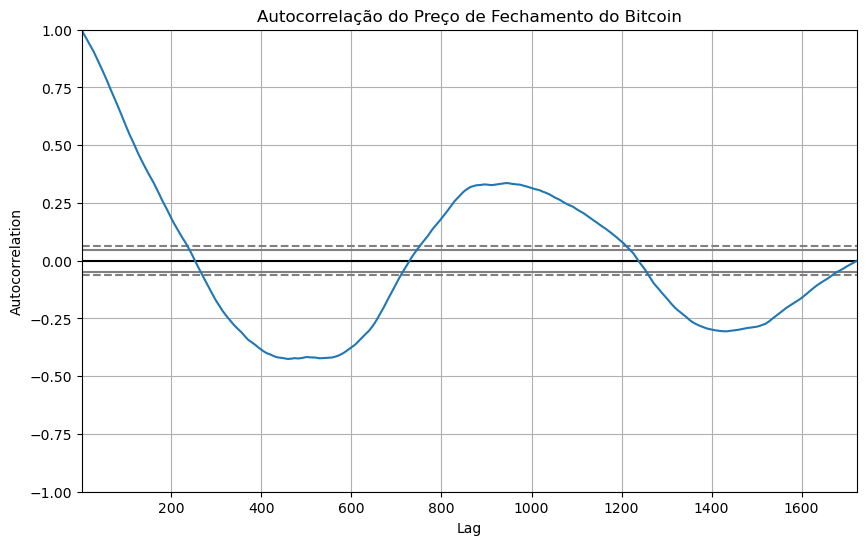

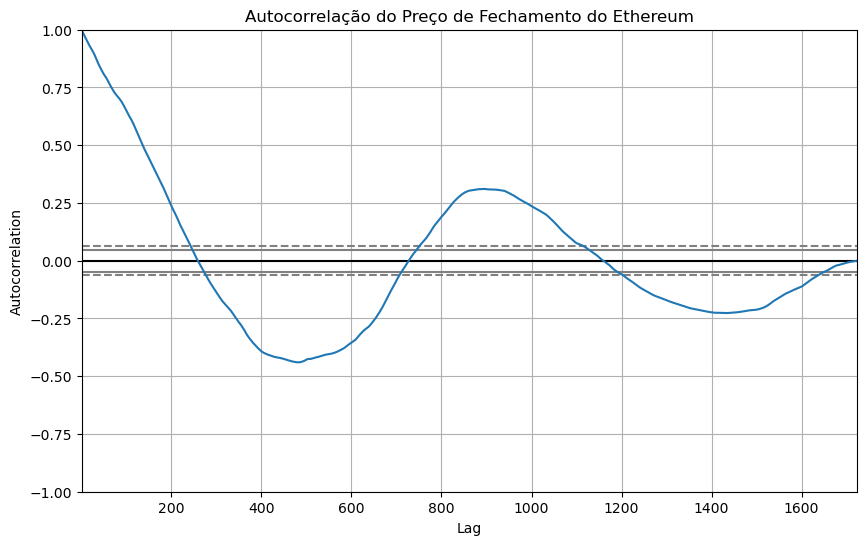

In [36]:
# Autocorrelação do preço de fechamento do Bitcoin
plt.figure(figsize=(10, 6))
autocorrelation_plot(market_df['Close_btc'])
plt.title('Autocorrelação do Preço de Fechamento do Bitcoin')
plt.show()

# Autocorrelação do preço de fechamento do Ethereum
plt.figure(figsize=(10, 6))
autocorrelation_plot(market_df['Close_eth'])
plt.title('Autocorrelação do Preço de Fechamento do Ethereum')
plt.show()


## Conclusão

Podemos argumentar que, após a análise exploratória, identificamos padrões temporais significativos no comportamento de preços de criptomoedas como Bitcoin e Ethereum. Esses ativos exibem oscilações ao longo do tempo que estão associadas a múltiplos fatores, incluindo tendências de mercado, sazonalidades, volatilidade e eventos específicos do setor.

Dada a natureza dos dados, em que as variáveis-chave — como os preços de abertura, fechamento e volume — são fortemente influenciadas por valores anteriores, fica evidente a importância de se utilizar um modelo de séries temporais para capturar essas dinâmicas. Um modelo temporal pode considerar as dependências de curto e longo prazo, além de lidar com as flutuações inerentes e possíveis sazonalidades presentes nos preços dos ativos.

Isso nos permitirá testar diferentes abordagens, como modelos que capturam tanto padrões lineares quanto não lineares, para prever variações de preço e identificar possíveis oportunidades de compra e venda. Portanto, a escolha de um modelo de série temporal será fundamental para a próxima fase da construção do sistema de apoio à tomada de decisão.